# PROJECT DWDM 
REAL ESTATE-PRICE PREDICTOR

In this project we have used Boston Housing Data set and add a Random forest algorithm to it and check the EDA(Exploratory Data Analysis) and applied a suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.

Group: 

Bhavin Baldota - 202100377

Nishant Musmade - 202101009

Bramha Nimbalkar - 202100381

Vidita Dhavane - 202100732

# Algorithm - Random Forest

Random forest is a supervised learning algorithm used for both classification and regression tasks. It is an ensemble learning method that builds multiple decision trees and combines them to make a final prediction.

Here are the key steps involved in building a random forest model:

1.Randomly select a subset of the training data.

2.Randomly select a subset of features to be used for each tree.

3.Build a decision tree on the selected subset of data and features.

4.Repeat steps 1 to 3 to create multiple decision trees.

5.For classification tasks, each tree outputs a class prediction, and the final prediction is made by a majority vote. For regression tasks, each tree outputs a numerical value, and the final prediction is the average of these values.

6.Evaluate the performance of the model on a validation set and tune the hyperparameters (such as the number of trees, maximum depth of the trees, etc.) to optimize the model's performance.

Random forest is a popular algorithm because it can handle large datasets with accuracy.

# Importing of data

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#    Features :
    
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

Relevant Information about data set -

 Concerns housing values in suburbs of Boston.

 Number of Instances: 506

 Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

# Summarize the Dataset

In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287772,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705207,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Graphs with respect to features

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

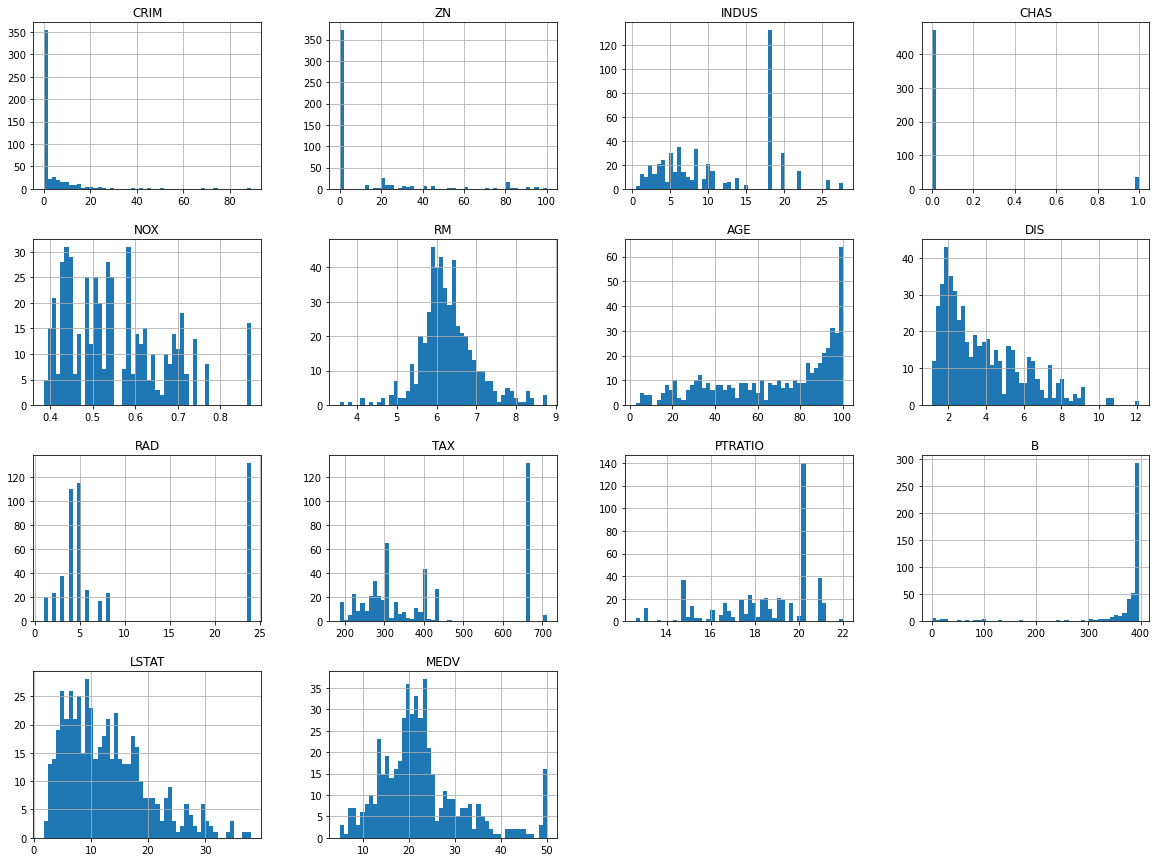

In [8]:
housing.hist(bins=50,figsize=(20,15))

# Train-Test Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42) 

In [11]:
print('Train set :',len(train_set),'Test set : ',len(test_set) )

Train set : 404 Test set :  102


Use of stratified shuffle for splitting data equally in train-test set

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    train_set=housing.loc[train_index]
    test_set=housing.loc[test_index]
    

In [14]:
housing=train_set.copy()

# Correlations - Insights from the data set

In [15]:
corr_matrix=housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680453
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

Values closer to 1  are positively good correlationships and values closer to -1 are negetively good correlations where as the ones closer to zero are said to bad correlationships

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
attributes=['MEDV','RM','ZN','LSTAT']

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

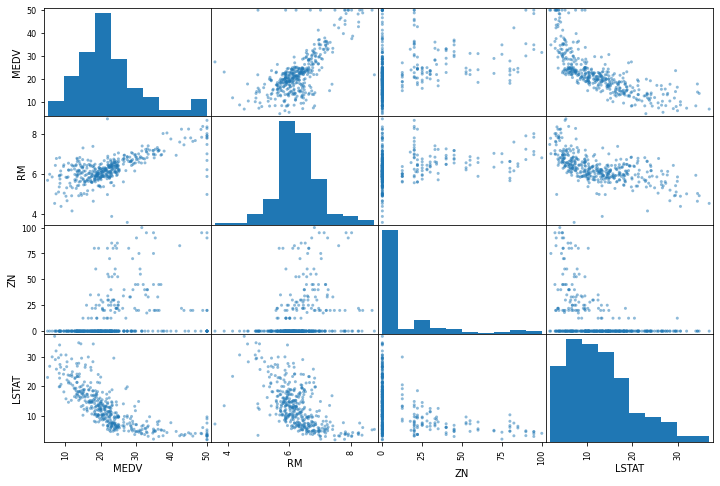

In [19]:
scatter_matrix(housing[attributes],figsize=(12,8))

As from the above graphs we can see that which are the good correlationships and which are the bad ones. 

The data points on the plot with are moving upwards with respect to y-axis tend to show a good correlation between 2 features.

For example - RM depicts number of room in the data set, as the number rooms increase MEDV i.e  price of the house also increases.

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

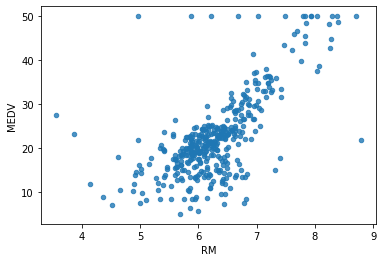

In [20]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

# Seperating labels from features in train set

Here we copy the MEDV column in labels variable and drop it from the main data set

In [21]:
housing=train_set.drop('MEDV',axis=1)
housing_labels=train_set['MEDV'].copy()

# Scikit Learn Design

Made up of 3 objects

  1.Estimator
  
  2.Transformer
  
  3.Predictor

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
    
])

In [23]:
housing_num_tr=my_pipeline.fit_transform(housing)

This is the pipeline which prepares the data to fit  in the model.

The data is tranformed according to the given steps in the pipeline

- It fits the missing values in the data set using the median strategy

- It scales the data which have highly deviated values

   (value-mean)/std 

In [24]:
housing_num_tr.shape

(404, 13)

# Selecting a model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [26]:
some_data=housing.iloc[:5]

In [27]:
some_labels=housing_labels.iloc[:5]

In [28]:
prep_data=my_pipeline.transform(some_data)

In [29]:
model.predict(prep_data)

array([22.519, 25.521, 16.494, 23.223, 23.512])

In [30]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

Here we can see that features of 5 data points is passed to the model and we can compare the predictions with the labels of the same.

# Evaluating the model

We can evalute the model with mean squared method

- we can check this for multiple models and compare the results 

- The model with the lesser mean squared error is best suited for the data set

- If the result comes out to be zero, there is a high possibility of overfitting of the model

In [31]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [32]:
rmse

1.239651896403754

# Using another evaluation technique - Cross Validation

We can use cross validation in case of the overfitting of the model, this helps us analyse the model in a better way.

we can compare the results of cross validation to choose our model as it uses a given number of data points and checks them keeping one data point for testing and remaining for training

It does this for all the given data points and gives mean or std or score to comapare the results with other models 

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-score)

In [34]:
def print_score(score):
    print('Score : ',score)
    print('Mean : ',score.mean())
    print('STD : ',score.std())
    

In [35]:
print_score(rmse_score)

Score :  [2.77117415 2.92494906 4.40820196 2.59805907 3.45531305 2.64171516
 4.8545907  3.33769532 3.21991799 3.20633414]
Mean :  3.3417950591856576
STD :  0.7081316991760312


These are the reults of the other 2 models we checked before Random forest regressor

Decision Tree Regressor:

Mean :  4.2619670976946455

STD :  0.7787035001174148


Linear Regression :

Mean :  5.027498756469269

STD :  1.0531104488653014

# Saving Model 

In [36]:
from joblib import dump,load
dump(model,'ML.joblib')

['ML.joblib']

# Testing Model

In [37]:
x_test=test_set.drop('MEDV',axis=1)
y_test=test_set['MEDV'].copy()
x_test_prep=my_pipeline.transform(x_test)
test_predictions=model.predict(x_test_prep)
test_mse=mean_squared_error(y_test,test_predictions)
rmse=np.sqrt(test_mse)

In [38]:
rmse

2.9090782786601928

In [39]:
prep_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24604124, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [40]:
from joblib import dump,load
model=load('ML.joblib')
features=np.array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24604124, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])
model.predict([features])

array([22.519])